In [2]:
##Import Libraries##

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import pandas as pd
from scipy.interpolate import interp1d

In [45]:
## Calculate density at each temperature using the thermal expansion formula ##

rho_0 = 8000              # Density of stainless steel 316 at 20°C (kg/m³)
T_0 = 20                  # Reference temperature (°C)
alpha = 16.0e-6           # Linear thermal expansion coefficient of stainless steal (1/°C)
temperatures = np.array([300, 400, 450, 500, 600]) # Temperature values

SS_den = rho_0 / (1 + alpha * (temperatures - T_0))         # ρ' = ρ/(1+αΔΤ) equation for density at temp T
Water_den = np.array([1878, 1840, 1808, 1758 , 1698])             # molden salt density
R = SS_den / Water_den                                      # Steinless steal density / molden density density
df = pd.DataFrame({'Temp (°C)': temperatures, 'SS_Den (kg/m³)': 
                   SS_den, 'MS_Den (kg/m3)': Water_den, 'Density Ratio':R})
print(df)

   Temp (°C)  SS_Den (kg/m³)  MS_Den (kg/m3)  Density Ratio
0        300     7964.319847            1878       4.240852
1        400     7951.653944            1840       4.321551
2        450     7945.336088            1808       4.394544
3        500     7939.028263            1758       4.515943
4        600     7926.442613            1698       4.668105


Enter a value for x: 41.672
For x = 41.67, the corresponding t value is: 3.50001


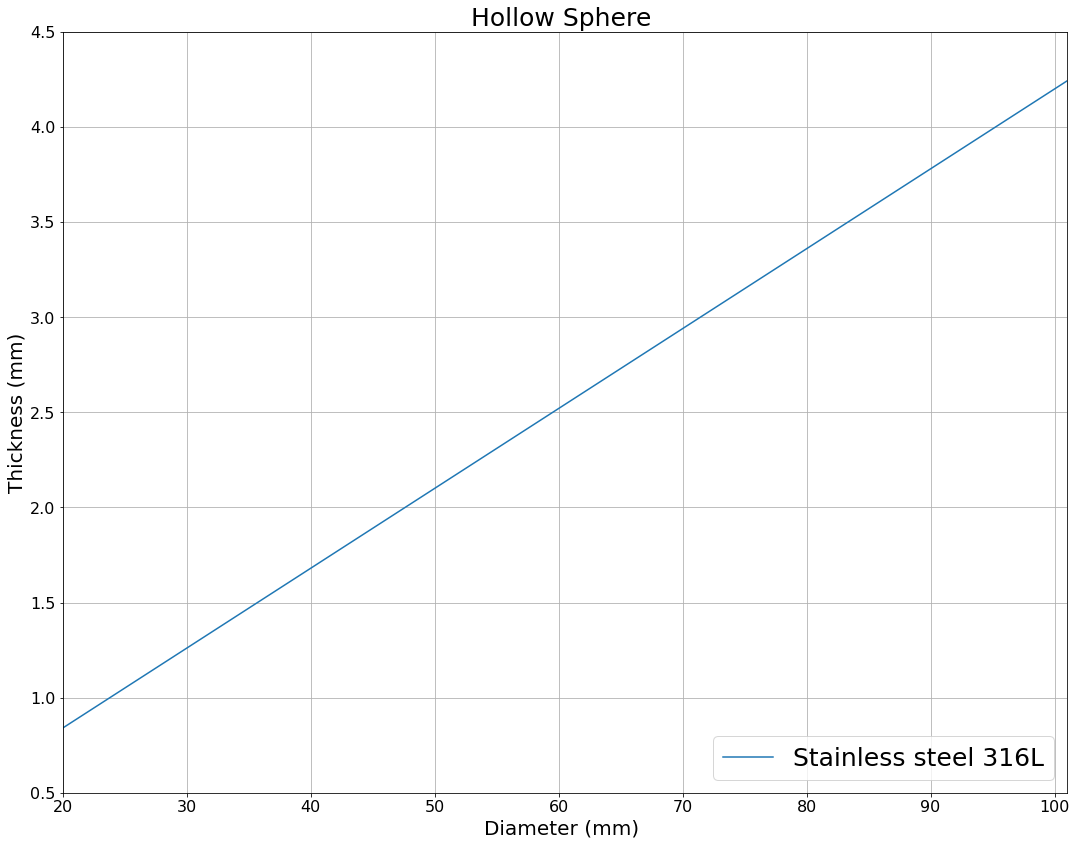

In [89]:
########################## Hollow Sphere ##############################3
R = 4.321551 # value of density ratio at T = 400C
# Define the equation to solve for t
def equation(t, x):
    return R * (3 * t * x**2 - 3 * x * t**2 + t**3) - x**3
x_values = np.linspace(10, 100, 500)  # 500 points for smooth plot
t_values = []
for x in x_values:
    root = fsolve(equation, x0=0.01, args=(x))  # Initial guess for t
    real_roots = root[np.isreal(root)].real  # Extract real solutions
    if len(real_roots) > 0:
        t_values.append(real_roots[0])  # Choose the first valid root
    else:
        t_values.append(np.nan)  # Avoid complex solutions
x_values = np.array(x_values)
t_values = np.array(t_values)
x_value = float(input("Enter a value for x: "))
root = fsolve(equation, x0=0.01, args=(x_value))  # Initial guess for t
real_roots = root[np.isreal(root)].real  # Extract real solutions
if len(real_roots) > 0:
    t_value = real_roots[0]  # Choose the first valid root
    print(f"For x = {x_value:.2f}, the corresponding t value is: {t_value:.5f}")
else:
    print("No real solution found.")

plt.figure(figsize=(18, 14))
plt.plot(x_values*2, t_values)

plt.legend(["Stainless steel 316L"], loc="lower right", fontsize=25)
plt.ylabel("Thickness (mm)", fontsize=20)
plt.xlabel("Diameter (mm) ", fontsize=20)
plt.title("Hollow Sphere ", fontsize=25)
plt.xlim([20, 101])
plt.ylim([0.5, 4.5])
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


In [85]:
#SPHRE MASS
rho = 8000         # density of stainless steal at 20C
x = 0.029766        # radius in meters
t = 0.0025          # thickness in meters
pi = 3.141592
m = rho*4/3*pi*(3*t*x**2-3*x*t**2+t**3)*1000
print(f"mass has to be exact: {m:.6f} grams")

mass has to be exact: 204.500823 grams


In [39]:
############################### Sphere Density Variation with 2.5 mm thickness ###########################
rho = 8000
x_i = 0.029816
t = 0.0025
pi = 3.141592
a = 16*10**-6
DT = 30

m_i = rho*4/3*pi*(3*t*x_i**2-3*x_i*t**2+t**3)
Vp_i = 4/3*pi*(x_i**3)*(1+a*DT)**3
ρ_i = m_i/Vp_i

print(f"max mass: {m_i*1000:.4f} grams")
print(f"min density: {ρ_i:.4f} kg/m^3")

x_a = 0.029716        
m_a = rho*4/3*pi*(3*t*x_a**2-3*x_a*t**2+t**3)
Vp_a = 4/3*pi*(x_a**3)*(1+a*DT)**3
ρ_a = m_a/Vp_a

print(f"min mass: {m_a*1000:.4f} grams")
print(f"max density: {ρ_a:.4f} kg/m^3")

max mass: 205.2181 grams
min density: 1845.6691 kg/m^3
min mass: 203.7848 grams
max density: 1851.3431 kg/m^3


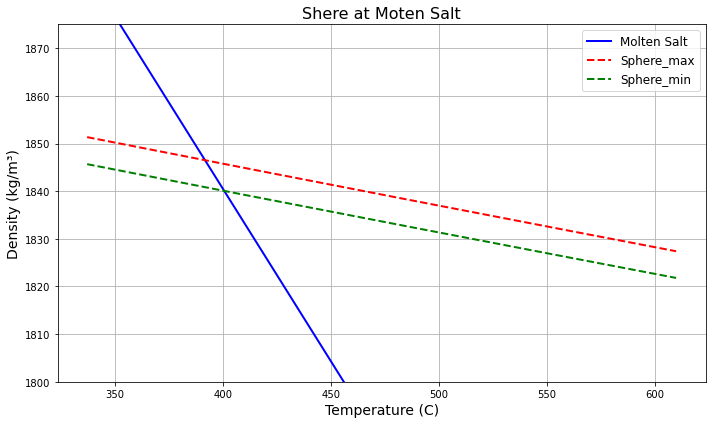

In [46]:
qN = 1900
qK = 1865
T0 = 337
rho_min = 1845.6691
rho_max = 1851.3431
a = 16.0e-6

# Temperature range
T_values = np.linspace(337, 610, 300)

# Calculate q_m (mixture density)
qN_T = qN - 0.723 * (T_values - T0)
qK_T = qK - 0.723 * (T_values - T0)
q_m = 0.6 * qN_T + 0.4 * qK_T


y2 = rho_max / (1 + 3 * a * (T_values - T0))
y3 = rho_min / (1 + 3 * a * (T_values - T0))

plt.figure(figsize=(10, 6))
plt.plot(T_values, q_m, label='Molten Salt', color='blue', linewidth=2)
plt.plot(T_values, y2, label='Sphere_max', color='red', linestyle='--', linewidth=2)
plt.plot(T_values, y3, label='Sphere_min', color='green', linestyle='--', linewidth=2)

plt.xlabel("Temperature (C)", fontsize=14)
plt.ylabel("Density (kg/m³)", fontsize=14)
plt.title("Shere at Moten Salt", fontsize=16)
plt.ylim([1800, 1875])
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Radius (mm) | Mass (g)
--------------------
29.766       | 83.960181
35.719       | 121.587126
41.672       | 166.161213
50           | 240.175965


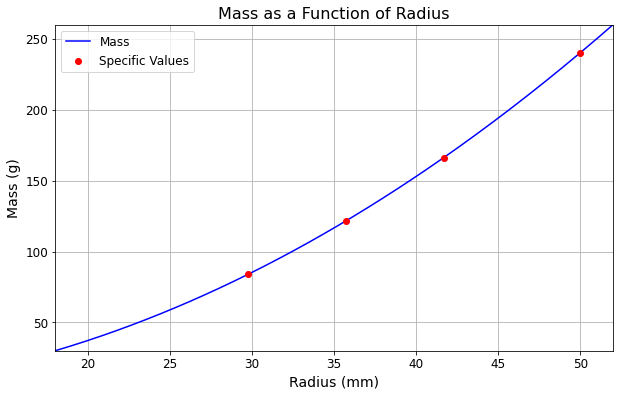

In [90]:
############################# Mass as a function of Radius #############################
rho = 7800  # kg/m^3
t = 0.001   # meters
pi = 3.141592  # Approximate value of π
def mass_equation(x):
    return rho * (4/3) * pi * (3 * t * x**2 - 3 * x * t**2 + t**3) * 1000  # Convert to grams

specific_x_values = [29.766, 35.719, 41.672, 50]  # these values are 2.5,3,3.5 thickness
specific_x_values_m = np.array(specific_x_values) / 1000  # Convert mm to meters
specific_m_values = mass_equation(specific_x_values_m)

print("Radius (mm) | Mass (g)")
print("--------------------")
for x, m in zip(specific_x_values, specific_m_values):
    print(f"{x:<12} | {m:.6f}")

x_values = np.linspace(10, 100, 500) / 1000  # Convert mm to meters
m_values = mass_equation(x_values)  # Compute m values

plt.figure(figsize=(10, 6))
plt.plot(x_values * 1000, m_values, label='Mass', color='b')
plt.scatter(specific_x_values, specific_m_values, color='red', label='Specific Values', zorder=3)

plt.xlabel("Radius (mm)", fontsize=14)
plt.ylabel("Mass (g)", fontsize=14)
plt.title("Mass as a Function of Radius", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.xlim([18, 52])
plt.ylim([30, 260])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()